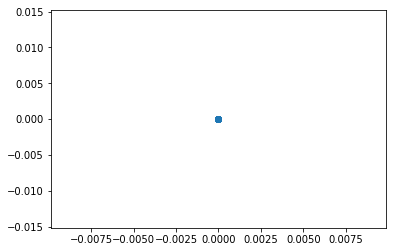

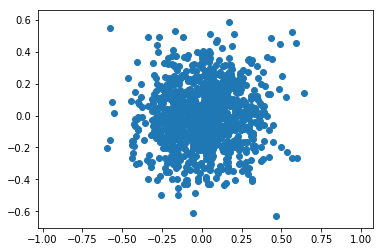

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math as M
from scipy.interpolate import griddata

# mu, sigma = 0, M.sqrt(2*nu*0.5)
GAMMA=1.0
nu=0.1
tf=1.0
n=1000
sigma=2*nu*tf
gamma=GAMMA/n

class vorticies():
    def __init__(self,gamma,x,y):
        self.x=x
        self.y=y
        self.gamma=gamma
        self.z=x+1j*y

# N=GAMMA/g_max
z=complex(0,0)
Pa=np.zeros(n,dtype=complex)
for i in range(n):
    Pa[i]=z
#     print(Pa[i].real)
    
plt.scatter(Pa.real,Pa.imag)
plt.show()

values=np.ones(n)*gamma

# for i in range(n):
x=np.random.normal(0, sigma,n)
y=np.random.normal(0, sigma,n)
#   print(x,y)

z=x+1j*y
Pa+=z
# print(Pa)   

xi = yi = np.linspace(-0.75,0.75,100)
xi,yi = np.meshgrid(xi,yi)

# def interpolator()

zi = griddata((x,y),values,(xi,yi),method='linear')

# mask out the field
# zi[mask] = np.nan


plt.figure()
# plt.contourf(xi,yi,values)
plt.scatter(Pa.real,Pa.imag)

plt.axis('equal')
plt.show()


In [7]:

from scipy.interpolate import griddata

grid_x, grid_y = np.mgrid[-0.5:0.5:100j, -0.5:0.5:100j]
values=np.ones(n,n)*gamma
from scipy import interpolate
xnew, ynew = np.mgrid[-1:1:70j, -1:1:70j]
tck = interpolate.bisplrep(grid_x, grid_y, values, s=0)
print len(tck)
# znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

plt.figure()
plt.contourf(xnew, ynew, tck)
plt.colorbar()
plt.title("Interpolated function.")
plt.show()




TypeError: data type not understood

In [7]:
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt

# auxiliary function for mesh generation
def gimme_mesh(n):
    minval = -1
    maxval =  1
    # produce an asymmetric shape in order to catch issues with transpositions
    return np.meshgrid(np.linspace(minval,maxval,n), np.linspace(minval,maxval,n+1))

# set up underlying test functions, vectorized
def fun_smooth(x, y):
    return np.cos(np.pi*x)*np.sin(np.pi*y)

def fun_evil(x, y):
    # watch out for singular origin; function has no unique limit there
    return np.where(x**2+y**2>1e-10, x*y/(x**2+y**2), 0.5)

# sparse input mesh, 6x7 in shape
N_sparse = 6
x_sparse,y_sparse = gimme_mesh(N_sparse)
z_sparse_smooth = fun_smooth(x_sparse, y_sparse)
z_sparse_evil = fun_evil(x_sparse, y_sparse)

# scattered input points, 10^2 altogether (shape (100,))
N_scattered = 10
x_scattered,y_scattered = np.random.rand(1,N_scattered**2)*2 - 1
plt.scatter(x_scattered,y_scattered)
plt.show()
z_scattered_smooth = fun_smooth(x_scattered, y_scattered)
z_scattered_evil = fun_evil(x_scattered, y_scattered)

# dense output mesh, 20x21 in shape
N_dense = 20
x_dense,y_dense = gimme_mesh(N_dense)


ValueError: need more than 1 value to unpack